## CS-E4825 - Probabilistic Machine Learning D (spring 2025)

Pekka Marttinen, Negar Safinianaini, Mihriban Kocak, Bo Zheng, Batuhan Avci.

## Exercise 4, due on Friday 7th February at 10:15.


### Contents
1. Problem 1: ML-II for linear model
2. Problem 2: Optimizing hyperparameters with validation set
3. Problem 3: Poisson regression with Laplace approximation


# Problem 1: ML-II for a linear model

Fit the Bayesian linear parameter model to a given data 'ex4_1_data.txt' using the ML II approach. Optimize the hyperparameters $\alpha$ and $\beta$ using grid search. Complete the template given below with your own code. Make predictions for the test data using the fitted model and compute the mean squared error for test data. Also plot the data and the fitted model.

In [2]:
# Starter code for problems 1 and 2. 
# NOTE: variables defined in this cell are used in code templates for problem 1 and 2.
import numpy as np
import matplotlib.pyplot as plt

# INITIALIZATION
# Load the observations
data = np.loadtxt('/coursedata/ex4_1_data.txt')
x_obs = data[:,0]
y_obs = data[:,1]

# Training data
N_train = 40
x_train = x_obs[:N_train]
y_train = y_obs[:N_train]

# Validation data
N_valid = 10
x_valid = x_obs[N_train:N_train+N_valid]
y_valid = y_obs[N_train:N_train+N_valid]

# Testing data
N_test = 10
x_test = x_obs[N_train+N_valid:]
y_test = y_obs[N_train+N_valid:]


x_range = (-5, 5) # Possible values of x are in this range

# Basis function parameters
num_basis_functions = 11
centers = np.linspace(x_range[0], x_range[1], num_basis_functions)
lambdaval = 0.17
# You can use here assume the correct basis function centers and lambda ...
def rbf(x, centers, lambdaval):
    # Radial Basis Function output for input x
    #
    # Inputs:
    # x : input points (one-dimensional array)
    # centers : basis function centers (one-dimensional array)
    # lambdaval : basis function width (scalar)
    #
    # Output:
    # Radial Basis Functions evaluated at x (two-dimensional array with len(x)
    #                                        rows and len(centers) columns)
    d = x[:,np.newaxis] - centers[np.newaxis,:]
    y = np.exp(-0.5 * (d ** 2) / lambdaval)
    return y

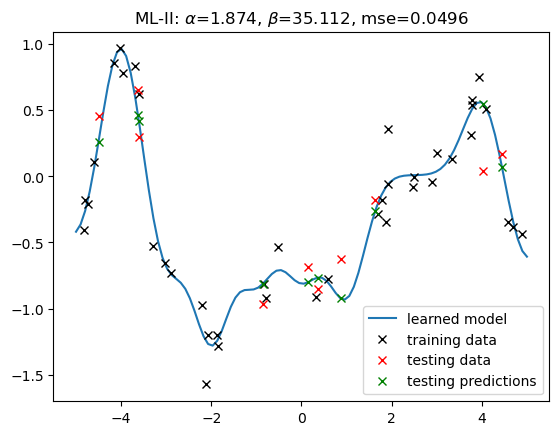

In [3]:
# Template for problem 1
def bayesian_linear_regression(phi_x, y, alpha, beta):
    # Bayesian linear parameter model
    #
    # Inputs:
    # phi_x : the basis function applied to x-data (two-dimensional array)
    # y : y-data (one-dimensional array)
    # alpha : the precision of the weight prior distribution (scalar)
    # beta : the precision of the assumed gaussian noise (scalar)
    #
    # Output:
    # the posterior mean, the posterior covariance, the log marginal likelihood

    N, B = phi_x.shape
    
    
    # Add here code to compute:
    # m = ? # EXERCISE: the posterior mean of w
    # S = ? # EXERCISE: the posterior covariance of w
    # S_inv = ? # EXERCISE: the inverse of S
    

    # YOUR CODE HERE
    
    #outer = np.zeros((B, B))
    #for i in range(0, N):
    #    outer += phi_x[i] @ np.transpose(phi_x[i])
    outer = np.transpose(phi_x) @ phi_x
    S_inv = alpha * np.identity(B) + beta * outer
    S = np.linalg.inv(S_inv)
    yx = np.zeros(B)
    for i in range(0, N):
        yx += y[i] * phi_x[i]
        
    m = beta * S @ yx
    
    # Note: This is a corrected version of equation 18.1.19 from Barbers book
    d = beta * np.dot(phi_x.T, y)
    log_likelihood = 0.5 * (-beta * np.dot(y, y) + d @ S @ d + np.log(np.linalg.det(2 * np.pi * S)) +
                            B * np.log(alpha) + N * np.log(beta) - N * np.log(2 * np.pi))
    return m, S, log_likelihood

# Specify possible values for the alpha and beta parameters to test
alphas = np.logspace(-3, 3, 100)
betas = np.logspace(-3, 3, 100)


# Grid search over possible values of alpha and beta
best_log_likelihood = -np.inf # optimal parameter values maximize the log likelihood 
for alpha in alphas:
    for beta in betas:
        # Use here functions rbf and bayesian_linear_regression to compute the
        # log marginal likelihood for given alpha and beta
        
        phi_x = rbf(x_train, centers, lambdaval)
        m, S, log_likelihood = bayesian_linear_regression(phi_x, y_train, alpha, beta)
        
        if best_log_likelihood < log_likelihood:
            best_log_likelihood = log_likelihood
            best_alpha = alpha
            best_beta = beta
       
        # What are the optimal values of alpha and beta, that maximize the marginal likelihood?
        
        # best_alpha = ? # EXERCISE
        # best_beta = ? # EXERCISE

        # Fit the model one more time using the optimal alpha and beta and the training data 
        # to get m for the optimal model
        
        # best_m = ? # EXERCISE
        
# Isn't this unnecessary to compute in each iteration of the loop? Just compute it once after the loop has terminated        
best_m, _, _ = bayesian_linear_regression(phi_x, y_train, best_alpha, best_beta)
        
        # YOUR CODE HERE

# Compute the final regression function
x_coord = np.linspace(x_range[0], x_range[1], 100)

# Compute the predicted values for inputs in x_coord using best_m
# y_mean = ? # EXERCISE

# YOUR CODE HERE
y_mean = np.dot(best_m, np.transpose(rbf(x_coord, centers, lambdaval)))
#y_mean = np.dot(best_m, x_coord)

# Plot the final learned regression function, together with the samples
plt.plot(x_coord, y_mean, label="learned model")
plt.plot(x_train, y_train, 'kx', label="training data")
plt.plot(x_test, y_test, 'rx', label="testing data")

# Make predictions for inputs in the test data, so that you get
# predictions 'y_pred' for inputs in x_test.
# y_pred = ? #EXERCISE

# YOUR CODE HERE
y_pred = np.dot(best_m, np.transpose(rbf(x_test, centers, lambdaval)))

# print(y_pred)

# Plot the predictions
plt.plot(x_test, y_pred, 'gx', label="testing predictions")

# Compute the mean squared prediction error for the test data.
# mse_test = ???

# YOUR CODE HERE
mse_test = np.mean((y_pred - y_test)**2)

plt.legend()
plt.title("ML-II: $\\alpha$=%.3f, $\\beta$=%.3f, mse=%.4f" %
          (best_alpha, best_beta, mse_test))
plt.show()

# Problem 2: Optimizing hyperparameters with validation set

As in problem 1, fit the Bayesian linear parameter model to a given data 'ex4_1_data.txt', but optimize the hyperparameters $\alpha$ and $\beta$ by dividing the training data into training and validation sets, and selecting the values of $\alpha$  and $\beta$ that minimize the mean squared error for the validation set. Make predictions for the test data using the fitted model and compute the mean squared error for test data. Plot the data and the fitted model.

best_alpha:  2.848035868435802
best_beta:  23.10129700083158


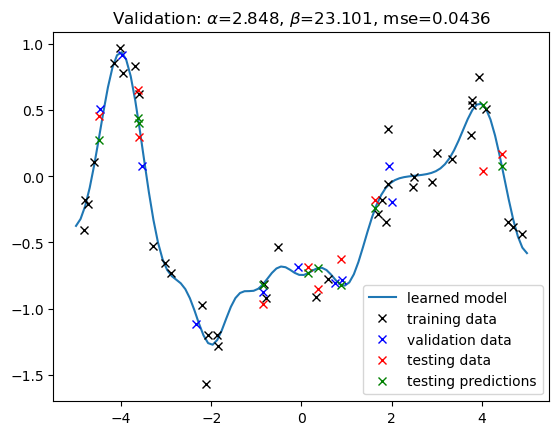

In [7]:
# Template for problem 2
# Specify possible values for the alpha and beta parameters to test
alphas = np.logspace(-3, 3, 100)
betas = np.logspace(-3, 3, 100)

# Grid search over possible values of alpha and beta
mse_valid = np.zeros((len(alphas), len(betas)))
for a, alpha in enumerate(alphas):
    for b, beta in enumerate(betas):
        
        # Use here functions rbf and bayesian_linear_regression to fit the
        # model and compute the prediction error (using mean squared error)
        # for the validation data
        
        # YOUR CODE HERE
        phi_x = rbf(x_train, centers, lambdaval)
        m, S, log_likelihood = bayesian_linear_regression(phi_x, y_train, alpha, beta)
        
        y_pred = np.dot(best_m, np.transpose(rbf(x_valid, centers, lambdaval)))
        
        mse = np.mean((y_pred - y_valid)**2)
        
        mse_valid[a][b] = mse
        

# What are the optimal values of alpha and beta, that minimize the prediction error in the validation data?
# best_alpha = ? #EXERCISE
# best_beta = ?  #EXERCISE

# YOUR CODE HERE

a, b = np.unravel_index(mse_valid.argmax(), mse_valid.shape)

best_alpha = alphas[a]
best_beta = betas[b]

print("best_alpha: ", best_alpha)
print("best_beta: ", best_beta)

# Fit the model one more time using the optimal alpha and beta and all data 
# available for model fitting (both training and validation sets)
# best_m = ? #EXERCISE

# YOUR CODE HERE

x_both = x_obs[:N_train+N_valid]
y_both = y_obs[:N_train+N_valid]

phi_x = rbf(x_both, centers, lambdaval)
best_m, _, _ = bayesian_linear_regression(phi_x, y_both, best_alpha, best_beta)

x_coord = np.linspace(x_range[0], x_range[1], 100)

# Compute the predicted values for inputs in x_coord using best_m
# y_mean = ? #EXERCISE

# YOUR CODE HERE
y_mean = np.dot(best_m, np.transpose(rbf(x_coord, centers, lambdaval)))

# Plot the final learned regression function, together with the samples
plt.plot(x_coord, y_mean, label="learned model")
plt.plot(x_train, y_train, 'kx', label="training data")
plt.plot(x_valid, y_valid, 'bx', label="validation data")
plt.plot(x_test, y_test, 'rx', label="testing data")

# Make predictions for inputs in the test data, so that you get
# predictions 'y_pred' for inputs in x_test.
# y_pred = ? ? # EXERCISE

# YOUR CODE HERE
y_pred = np.dot(best_m, np.transpose(rbf(x_test, centers, lambdaval)))

# Plot the predictions
plt.plot(x_test, y_pred, 'gx', label="testing predictions")

# Compute the mean squared prediction error for the test data.
# mse_test = ? # EXERCISE

# YOUR CODE HERE
mse_test = np.mean((y_pred - y_test)**2)

plt.legend()
plt.title("Validation: $\\alpha$=%.3f, $\\beta$=%.3f, mse=%.4f" %
          (best_alpha, best_beta, mse_test))
plt.show()

# Problem 3: Poisson regression with Laplace approximation

Poisson regression can be used to model count data. A Poisson regression model can be defined as
\begin{align}
    y_i \mid \boldsymbol{\theta} & \sim \operatorname{Poisson}(\exp(\boldsymbol{\theta}^T \mathbf{x}_i )) \\
    \theta &\sim \mathcal{N}(\mathbf{0}, \alpha^{-1} \mathbf{I})
\end{align}
where $y_i$ are the observed counts, $\mathbf{x}_i$ the related covariates, $i = 1,\ldots,N$, and $\boldsymbol{\theta}^T$ are the regression weights. In this exercise, we approximate the posterior $p(\boldsymbol{\theta} \mid \mathbf{y})$ using the Laplace approximation. We will do this in two steps. In the first step we will derive the gradient $-\nabla \log p(\boldsymbol{\theta} \mid \mathbf{y} )$ and in the second step we will write Laplace approximation. And finally, we will look compare the true density with the laplace approximation.  

**(a)** Derive the gradient $-\nabla \log p(\boldsymbol{\theta} \mid \mathbf{y} )$ and the Hessian $\mathbf{H} = -\nabla\nabla\log p( \boldsymbol{\theta} \mid y)$ needed for the Laplace approximation. 

**(b)** Write the Laplace approximation as the density of a Gaussian distribution. What is the mean and the covariance matrix of this distribution?  

**(c)** Compare the Laplace approximation to the true posterior (computed using numerical integration), in a case where we have one-dimensional covariates only. Use data given in the file 'ex4\_4\_data.txt' and hyperparameter value $\alpha = 10^{-2}$. Plot the two posteriors and the true value $\theta = \pi/4$ used to generate the data. Also plot the data with the regression line $\hat y_i = \exp(\hat\theta x_i)$ using the MAP estimate $\hat{\boldsymbol{\theta}}$. The code template below at the end of the notebook will help with this.


### Solutions to 3a and 3b
Write your solutions to __(3a)__ and __(3b)__ in LateX or attach a picture in this cell.




Suppose $\theta$ is a N-variate random vector

Prior: 

$p(\theta) = \frac{1}{\sqrt{(2\pi)^N det(\alpha^{-1} I)}} \exp(-\frac{1}{2} (\theta - 0)^\top (\alpha^{-1} I)^{-1} (\theta - 0)) = \sqrt{\frac{\alpha^{N}}{(2\pi)^N}} \exp(-\frac{\alpha}{2} \theta^\top \theta)$

Probability of $y_i$ given $\theta$:

$p(y_i \ | \ \theta) = \frac{\exp(\theta^\top x_i)^{y_i} e^{-\exp(\theta^\top x_i)}}{(y_i)!} = \frac{\exp((\theta^\top x_i) y_i -\exp(\theta^\top x_i))}{(y_i)!}$

Likelihood of $y_i$:

$p(y_i) = \int_{\mathbb{R}^k} p(y_i \ | \ \theta) d\theta$


Let us assume that the observed counts $y_i$ are uncorrelated and therefore we can write:

$p(y) = \Pi_{i=1}^N p(y_i)$ and $p(y \ | \ \theta) = \Pi_{i=1}^N p(y_i \ | \ \theta) = \frac{\exp(\Sigma_{i=1}^N (\theta^\top x_i) y_i -\exp(\theta^\top x_i))}{\Pi_{i=1}^N (y_i)!}$

With these the logarithm of the posterior distribution is:

$\log(p(\theta \ | \ y)) = \log(\frac{p(\theta) p(y \ | \ \theta)}{p(y)}) = \log(p(\theta) p(y \ | \ \theta)) - \log(p(y))$

$\Rightarrow \nabla \log(p(\theta \ | \ y)) = \nabla (\log(p(\theta) p(y \ | \ \theta)) - \log(p(y))) = \nabla \log(p(\theta) p(y \ | \ \theta))$

Now using the chain rule we get: $ \nabla \log(p(\theta \ | \ y)) = \frac{1}{p(\theta) p(y \ | \ \theta)} \nabla ( p(\theta) p(y \ | \ \theta))$

Using the product rule: $ \nabla \log(p(\theta \ | \ y)) = \frac{1}{p(\theta) p(y \ | \ \theta)} ( p(y \ | \ \theta) \nabla p(\theta) + p(\theta) \nabla p(y \ | \ \theta))$

Let us look at the two gradients separately:

$\nabla p(\theta) = \sqrt{\frac{\alpha^{N}}{(2\pi)^N}} \nabla \exp(-\frac{\alpha}{2} \theta^\top \theta) = \sqrt{\frac{\alpha^{N}}{(2\pi)^N}} \exp(-\frac{\alpha}{2} \theta^\top \theta) \nabla (-\frac{\alpha}{2} \theta^\top \theta) = \sqrt{\frac{\alpha^{N}}{(2\pi)^N}} \exp(-\frac{\alpha}{2} \theta^\top \theta) (-\frac{\alpha}{2} 2 \theta) = - \alpha \sqrt{\frac{\alpha^{N}}{(2\pi)^N}} \exp(-\frac{\alpha}{2} \theta^\top \theta) \ \theta = -\alpha p(\theta) \ \theta$

$\nabla p(y \ | \ \theta) = \nabla ( \frac{\exp(\Sigma_{i=1}^N (\theta^\top x_i) y_i -\exp(\theta^\top x_i))}{\Pi_{i=1}^N (y_i)!} ) = \frac{1}{\Pi_{i=1}^N (y_i)!}  \nabla \exp(\Sigma_{i=1}^N (\theta^\top x_i) y_i -\exp(\theta^\top x_i)) = \frac{1}{\Pi_{i=1}^N (y_i)!} \exp(\Sigma_{i=1}^N ( (\theta^\top x_i) y_i -\exp(\theta^\top x_i))) \ \nabla (\Sigma_{i=1}^N (\theta^\top x_i) y_i -\exp(\theta^\top x_i))$

$= \frac{1}{\Pi_{i=1}^N (y_i)!} \exp(\Sigma_{i=1}^N (\theta^\top x_i) y_i -\exp(\theta^\top x_i)) \ \Sigma_{i=1}^N ( \nabla (\theta^\top x_i) y_i -\exp(\theta^\top x_i)) = \frac{1}{\Pi_{i=1}^N (y_i)!} \exp(\Sigma_{i=1}^N (\theta^\top x_i) y_i -\exp(\theta^\top x_i)) \ \Sigma_{i=1}^N (  y_i x_i -\exp(\theta^\top x_i) x_i) = p(y \ | \ \theta) \ \Sigma_{i=1}^N (  y_i x_i -\exp(\theta^\top x_i) x_i)$

Combining these results we get:

$-\nabla \log(p(\theta \ | \ y)) = -\frac{1}{p(\theta) p(y \ | \ \theta)} (p(y \ | \ \theta) (-\alpha p(\theta) \ \theta) + p(\theta) (p(y \ | \ \theta) \ \Sigma_{i=1}^N (  y_i x_i -\exp(\theta^\top x_i) x_i)) = \alpha \theta -\Sigma_{i=1}^N (  y_i x_i -\exp(\theta^\top x_i) x_i)$

Using that we can now proceed to the Hessian.

$H = -\nabla \nabla \log(p(\theta \ | \ y)) = \nabla (\alpha \theta -\Sigma_{i=1}^N (  y_i x_i -\exp(\theta^\top x_i) x_i)) = \alpha I_N - \Sigma_{i=1}^N \nabla (y_i x_i -\exp(\theta^\top x_i) x_i) = \alpha I_N - \Sigma_{i=1}^N (-\exp(\theta^\top x_i) x_i \nabla(\theta^\top x_i))$

$H = \alpha I_N + \Sigma_{i=1}^N (\exp(\theta^\top x_i) x_i x_i^\top))$

277.1901677806984


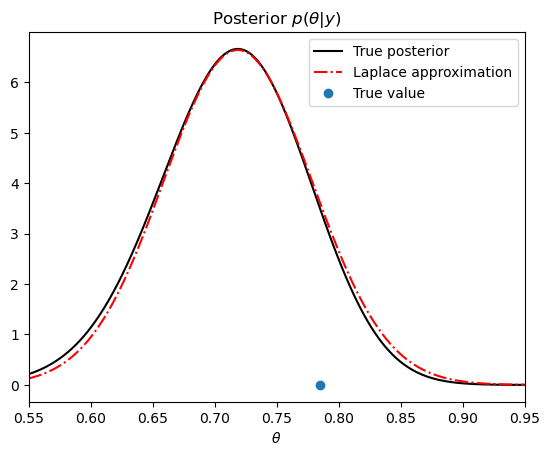

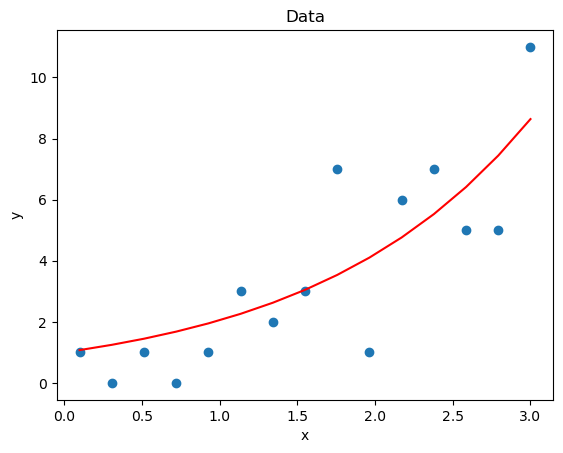

In [39]:
# Template for problem 3(c)
# NOTE: starter code at the begining of the notebook and function 'bayesian_linear_regression' 
#       is required to run this cell

import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.stats import norm

# get some data
data = np.loadtxt('/coursedata/ex4_4_data.txt')
x = data[:,0]
y = data[:,1]

theta_true = np.pi / 4 # true parameter used to generate the data
alpha = 1e-2 # prior's parameter

# compute Laplace approximation
theta_lapl = 0.5 # initial
# iterate to optimum with newton's method to find the MAP estimate for theta
for iter in range(100):
    # compute gradient
    # grad = ???
    
    # YOUR CODE HERE
    grad = alpha * theta_lapl - np.sum(y * x - np.exp(theta_lapl * x) * x, axis=0)
    

    # compute Hessian
    # H = ???
    
    # YOUR CODE HERE
    H = alpha + np.sum(np.exp(theta_lapl * x) * x**2, axis=0)
    
    
    theta_lapl = theta_lapl - grad / H # do newton step

# compute Hessian at optimum
# H = ???

# YOUR CODE HERE
H = alpha + np.sum(np.exp(theta_lapl * x) * x**2, axis=0)
print(H)
difference = theta_lapl - theta_true

# plot posterior densities
theta = np.linspace(0.55, 0.95, 1000)
post_true = np.zeros(len(theta))
for i in range(len(theta)):
    # log posterior:    
    post_true[i] = (np.dot(y, x * theta[i]) - np.sum(np.exp(x * theta[i]) -
                    np.log(factorial(y))) - 0.5*alpha*np.dot(theta[i], theta[i]))

M = np.amax(post_true)
post_true = np.exp(post_true-M) / np.sum(np.exp(post_true-M)) / (theta[1]-theta[0]) # normalize

# compute approximative density at the points 'theta'
# Hint: you can use norm.pdf from scipy.stats
# post_laplace = ???
               

# YOUR CODE HERE
post_laplace = norm.pdf((theta - theta_lapl) * np.sqrt(H) ) * np.sqrt(H)
    
plt.figure(1)
plt.plot(theta, post_true, '-k', label="True posterior")
plt.plot(theta, post_laplace, '-.r', label="Laplace approximation")
plt.plot(theta_true, 0, 'o', label="True value")
plt.xlim(0.55, 0.95)
plt.xlabel('$\\theta$')
plt.title('Posterior $p(\\theta|y)$')
plt.legend()

plt.figure(2)
plt.plot(x, y, 'o', x, np.exp(theta_lapl*x), '-r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()